<a href="https://colab.research.google.com/github/Pratikdate/ML_Model_Notes/blob/main/Random_Forest_bagging_and_pasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

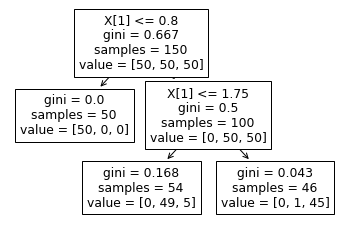

In [ ]:
from sklearn import tree


tree.plot_tree(tree_clf)
plt.show()

Decision Tree
requires going through roughly O(log2
(m)) nodes.3
 Since each node only requires
checking the value of one feature, the overall prediction complexity is just O(log2
(m)),
independent of the number of features. So predictions are very fast, even when deal‐
ing with large training sets.

Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. Stan‐
dard statistical tests, such as the χ
2
test, are used to estimate the
probability that the improvement is purely the result of chance
(which is called the null hypothesis). If this probability, called the p-
value, is higher than a given threshold (typically 5%, controlled by
a hyperparameter), then the node is considered unnecessary and its
children are deleted. The pruning continues until all unnecessary
nodes have been pruned.

Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

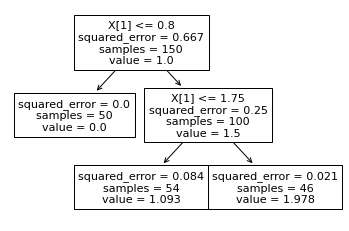

In [ ]:
tree.plot_tree(tree_reg)
plt.show()

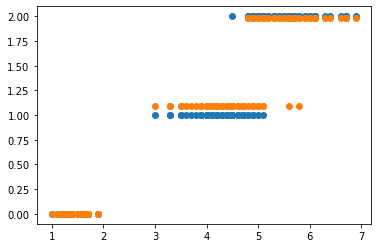

In [ ]:
pre=tree_reg.predict(X)
plt.scatter(X[:,0],y)
#plt.scatter(X[:,1],y)

plt.scatter(X[:,0],pre)
#plt.scatter(X[:,1],pre)

Just like for classification tasks, Decision Trees are prone to overfitting when dealing
with regression tasks. Without any regularization (i.e., using the default hyperpara‐
meters), you get the predictions on the left of Figure 6-6. It is obviously overfitting
the training set very badly. Just setting min_samples_leaf=10 results in a much more
good model

Ensemble Learning and Random Forests

if you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of pre‐
dictors is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

In [ ]:
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

11490434/11490434 [==============================] - 0s 0us/step
shape : (10000, 28, 28)


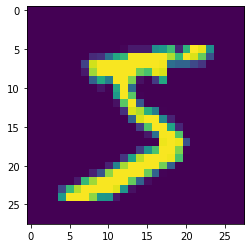

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0



number=0
print('shape :',x_test.shape)
plt.imshow(x_train[number])

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


vot_clf=VotingClassifier([('lc',log_clf),('rc',rnd_clf),('svm',svm_clf)])


vot_clf.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Bagging and Pasting

One way to get a diverse set of classifiers is to use very different training algorithms,
as just discussed. Another approach is to use the same training algorithm for every
predictor, but to train them on different random subsets of the training set.

When
sampling is performed with replacement, this method is called bagging1
(short for
bootstrap aggregating2
).

When sampling is performed without replacement, it is called pasting. 3

predictors can all be trained in parallel, via different
CPU cores or even different servers. Similarly, predictions can be made in parallel.
This is one of the reasons why bagging and pasting are such popular methods: they
scale very well.

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:



x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

score=[]

for i in range(1,5):

    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=100*i,
        max_samples=20*i, bootstrap=True, n_jobs=-1)
    


    bag_clf.fit(x_train, y_train)
    sc=bag_clf.score(x_test,y_test)
    score.append(sc)

#y_pred = bag_clf.predict(x_test)

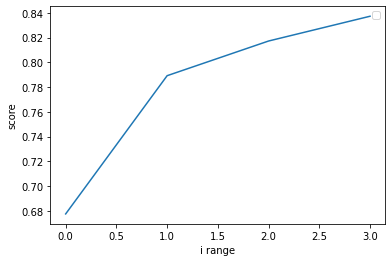

In [ ]:
plt.plot(score)
plt.xlabel('i range')
plt.ylabel('score')
plt.legend()

In [ ]:
bag_clf.score(x_test,y_test)

0.8483


(–1 tells Scikit-Learn to use all available cores):



The BaggingClassifier automatically performs soft voting
instead of hard voting if the base classifier can estimate class proba‐
bilities (i.e., if it has a predict_proba() method), which is the case
with Decision Trees classifiers.

the main differance between baging and votingclassifier is to bagging take one model which we implement multiple time for randomly sampled datset



if we set boostrap false then we remove random sampling

in votingclassifier we train model on same or different models

default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.6
 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
for all predictors.

Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set.

you can set oob_score=True when creating a BaggingClassifier to
request an automatic oob evaluation after training.

In [ ]:

bag_clf = BaggingClassifier(


DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)

Random Forests

As we have discussed, a Random Forest9
 is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and pass‐
ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10

The Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node (see Chapter 6), it
searches for the best feature among a random subset of features. This results in a
greater tree diversity, which (once again) trades a higher bias for a lower variance,
generally yielding an overall better model.

In [ ]:

from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)



y_pred_rf = rnd_clf.predict(x_test)

In [ ]:
rnd_clf.score(x_test,y_test)

0.8301

In [ ]:

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)


bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [ ]:
bag_clf.score(x_test,y_test)

0.7422

Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node (see Chapter 6), it
searches for the best feature among a random subset of features. This results in a
greater tree diversity, which (once again) trades a higher bias for a lower variance,
generally yielding an overall better model.